In [ ]:


import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten, Conv2D, MaxPool2D



2023-07-07 10:06:46.700303: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 10:06:46.834300: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-07 10:06:46.839958: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-07 10:06:46.839976: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [ ]:

def build_cnn(input_shape=(224,224,3), num_classes = 10):
    ''' Defines a CNN Model with specified number of Input shape and number of classes'''
    model = Sequential()

    model.add(Conv2D(32,(3,3),activation = 'relu',
                    input_shape = input_shape))

    model.add(MaxPool2D((2,2)))

    model.add(Conv2D(64,(3,3),activation = 'relu'))
    model.add(MaxPool2D((2,2)))

    model.add(Flatten())

    model.add(Dense(num_classes, activation='softmax'))
    return model


In [ ]:
model = build_cnn()


2023-07-07 10:06:52.899151: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-07 10:06:52.899186: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-07 10:06:52.899208: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dai-Precision-7820-Tower): /proc/driver/nvidia/version does not exist
2023-07-07 10:06:52.899497: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 10)                1

In [ ]:
# Create the object of image data generator

In [ ]:

train_datagen = ImageDataGenerator(
                rescale=1/255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip = True)


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1/255)


In [ ]:

train_dataset = train_datagen.flow_from_directory(
               '/home/dai/scripts/Computer Vision/tiny-imagenet-200/train',
               target_size = (224,224), # all the images are loaded into this size
               batch_size = 32,
               class_mode = 'categorical')

Found 5000 images belonging to 10 classes.


In [ ]:

test_dataset = test_datagen.flow_from_directory(
               '/home/dai/scripts/Computer Vision/tiny-imagenet-200/val',
               target_size = (224,224),
               batch_size = 32,
               class_mode = 'categorical')

Found 10000 images belonging to 1 classes.


In [ ]:
train_dataset.class_indices


{'n01443537': 0,
 'n01629819': 1,
 'n01641577': 2,
 'n01644900': 3,
 'n01698640': 4,
 'n01742172': 5,
 'n01768244': 6,
 'n01770393': 7,
 'n01774384': 8,
 'n01774750': 9}

In [ ]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])



In [ ]:
model.fit(train_dataset, epochs = 2)


Epoch 1/2
157/157 [==============================] - 75s 477ms/step - loss: 1.1575 - accuracy: 0.6106
Epoch 2/2
157/157 [==============================] - 75s 475ms/step - loss: 1.1434 - accuracy: 0.6158


In [ ]:
#predict class of new image
import matplotlib.pyplot as plt


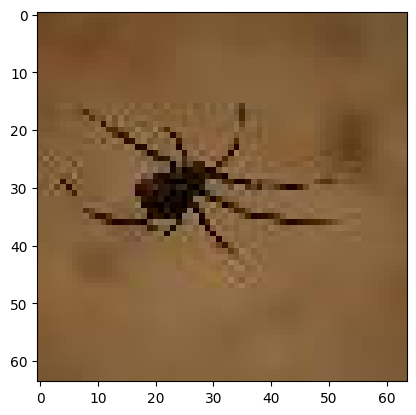

In [ ]:
new = plt.imread('/home/dai/scripts/Computer Vision/tiny-imagenet-200/val/images/val_192.JPEG')
plt.imshow(new)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/home/dai/scripts/Computer Vision/tiny-imagenet-200/val/images/val_192.JPEG', target_size=(224,224))

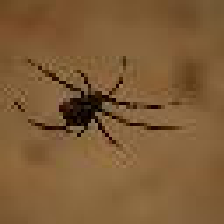

In [ ]:
test_image

In [ ]:
test_image = image.img_to_array(test_image)

In [ ]:
test_image = np.expand_dims(test_image,axis= 0)

In [ ]:
test_image.shape

(1, 224, 224, 3)

In [ ]:
model.predict(test_image)

1/1 [==============================] - 0s 29ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
model.predict(test_image)[0][0]

1/1 [==============================] - 0s 26ms/step


0.0

In [ ]:
np.argmax(model.predict(test_image))

1/1 [==============================] - 0s 25ms/step


8